# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 18.8 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.1 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.1 

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Python/foodhub_order.csv')

In [4]:
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
print('There are ', data.shape[0], 'rows and ', data.shape[1], 'columns.')

There are  1898 rows and  9 columns.


#### Observations: The dataset Has 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

*   We have 4 columns with integers 4 columns with strings and one column with float type numbers.
*   We can observe that the raiting is an object when it would make more sense for it to be an integer.
*   The day of the week data is of type object, it will be more convenient to have a date format.
*   We can also observe that there aren't any missing values.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
data.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


In [8]:
print(data.isna().sum())

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:
We have no missing values on the dataset. However the ratings column is an object when it would make more sense as an integer of float.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:

*   The minimum time it takes to prepare food according to the data is 20.00 mins.
*   The average time it takes to prepare food according to the data is 27.37 mins.
*   The maximum time it takes to prepare food according to the data is 35.00 mins.




### **Question 5:** How many orders are not rated? [1 mark]

In [10]:
data['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [16]:
print('There are ', (data['rating'] == 'Not given').sum(), 'non rated orders')


There are  736 non rated orders


In [15]:
print('The percentage of non rated orders is ', (data['rating'] == 'Not given').sum()/data.shape[0]*100, '%')

The percentage of non rated orders is  38.77766069546891 %


#### Observations:
736 orders are not rated, we'll have to explore deeper to find the best way to fix this.
This represents 38.77% missing, it's a considerable percentage so droping the data might not be the best way to approach this, however the approach can be determined once we explore deeper and find the variable correlations.  



In [17]:
data.loc[data['rating'] == 'Not given']

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,Not given,34,28
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,Not given,23,30
...,...,...,...,...,...,...,...,...,...
1887,1476873,237616,Shake Shack,American,5.82,Weekend,Not given,26,30
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24


A good way to approach will be grouping the missing data by restaurant to analize the average ratings per restaurant.

In [44]:
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
restaurant_raiting = data.groupby('restaurant_name')['rating'].mean()
print(restaurant_raiting)

restaurant_name
'wichcraft          5.000000
12 Chairs           4.500000
5 Napkin Burger     4.000000
67 Burger           5.000000
Alidoro                  NaN
                      ...   
Zero Otto Nove      4.000000
brgr                3.000000
da Umberto          5.000000
ilili Restaurant    4.153846
indikitch           4.500000
Name: rating, Length: 178, dtype: float64


We have 178 different restaurants, I will fill the missing rating data with the mean value of the corresponding restaurant.

In [45]:
data['rating'] = data['rating'].fillna(value = data.groupby('restaurant_name')['rating'].transform('mean'))

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1868 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


In [47]:
data['rating'].unique()

array([       nan, 4.33333333, 5.        , 3.        , 4.        ,
       4.51190476, 4.75      , 4.71428571, 4.27819549, 4.15384615,
       4.85714286, 4.23529412, 4.35714286, 4.875     , 3.25      ,
       4.328125  , 4.24390244, 4.59090909, 4.55555556, 4.12820513,
       4.17647059, 4.28571429, 4.27272727, 4.05882353, 4.5       ,
       4.2       , 4.21917808, 4.7       , 4.43478261, 3.66666667,
       4.66666667, 4.41666667, 4.61538462, 3.5       , 4.36363636,
       3.75      , 4.4       , 4.25      , 4.34782609, 4.125     ,
       4.3       , 4.31578947, 4.6       , 3.33333333])

Rating is a float now which means all the 'Not given' string values were now replaced by the restaurant's raiting mean.
The values were integers before so now I'll round the rating mean values and convert to integers, but first I must handle the Nan value.

In [48]:
data['rating'] = data['rating'].fillna(0).astype(int)
data['rating'] = data['rating'].astype(float).round(0).astype(int)
data['rating'].unique()

array([0, 4, 5, 3])

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

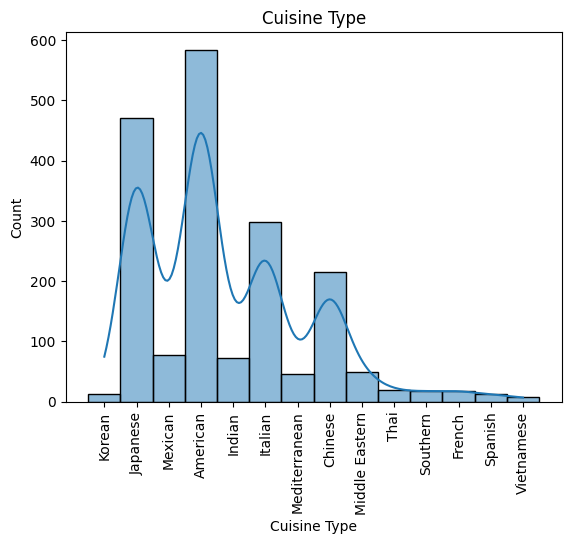

In [18]:
sns.histplot(data=data, x = 'cuisine_type', kde= True);
plt.xticks(rotation=90)
plt.title('Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.show()

We can observe that the most popular cuisine types are American, Italian and Chinese. I wanted to check this first to see if the ammount of orders per cuisine type affects totals costs too.

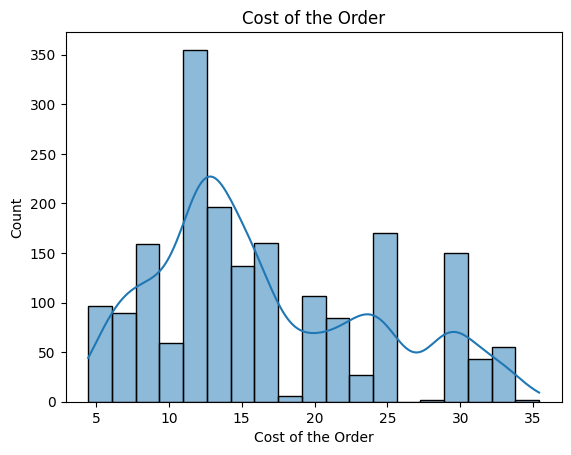

In [19]:
sns.histplot(data=data, x = 'cost_of_the_order', kde= True);
plt.title('Cost of the Order')
plt.xlabel('Cost of the Order')
plt.ylabel('Count')
plt.show()

Most of the orders have a total cost between 11 and 12 dollars. This indicates small orders since it's a really cheap price.

<Figure size 2000x1000 with 0 Axes>

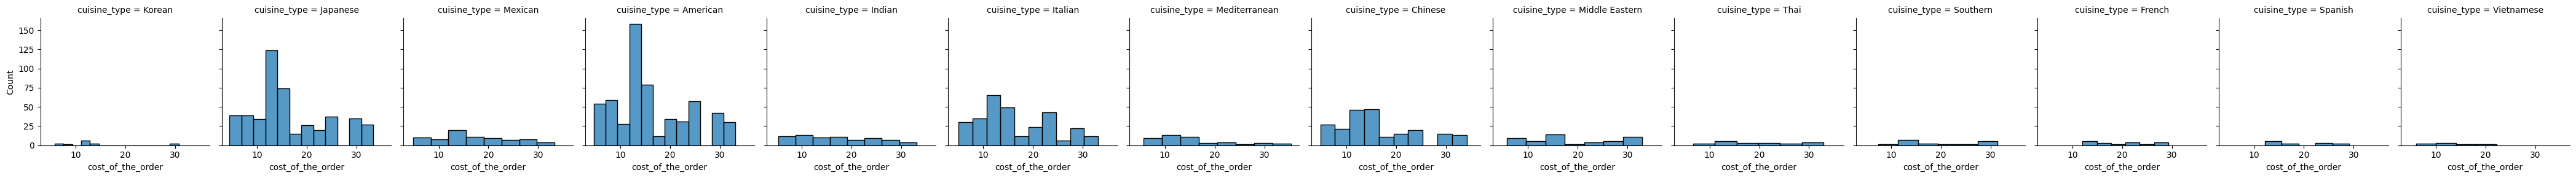

<Figure size 2000x1000 with 0 Axes>

In [34]:
g = sns.FacetGrid(data, col = 'cuisine_type')
g.map(sns.histplot, 'cost_of_the_order');
plt.figure(figsize=(20,10))

We can observe that the most expensive type of cuisine are American, Japanese, Indian and Mexican.

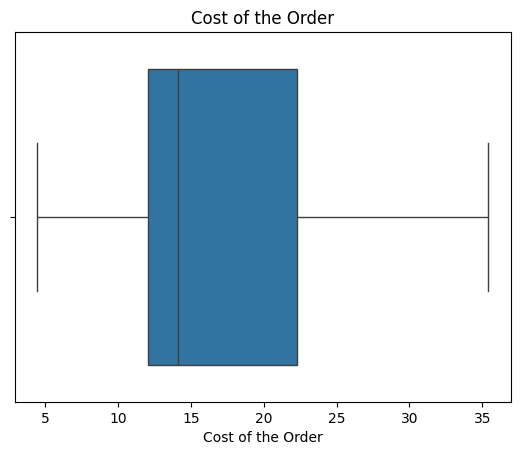

In [21]:
sns.boxplot(data=data, x = 'cost_of_the_order')
plt.title('Cost of the Order')
plt.xlabel('Cost of the Order')
plt.show()

*   We can observe that the Cost of the order column is slightly right skewed
*   50% of the order cost lies between 12 to 23 dollars.
*   We have no outliers
*   The highest cost it's 35 which it's not really an expensive price for food plus delivery.



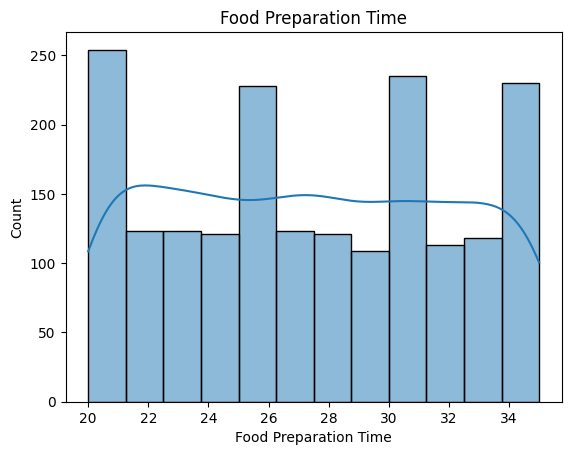

In [29]:
sns.histplot(data=data, x = 'food_preparation_time', kde= True);
plt.title('Food Preparation Time')
plt.xlabel('Food Preparation Time')
plt.ylabel('Count')
plt.show()

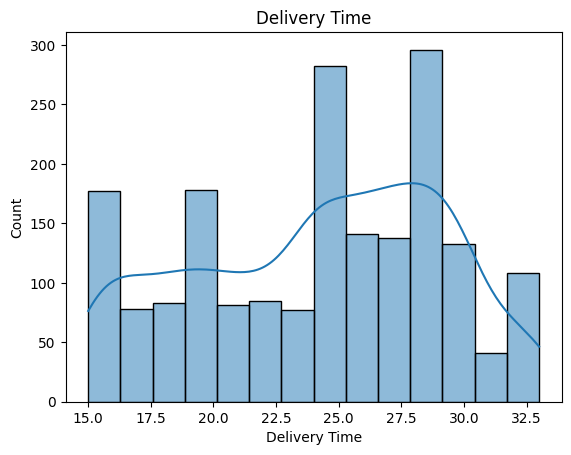

In [30]:
sns.histplot(data=data, x = 'delivery_time', kde= True);
plt.title('Delivery Time')
plt.xlabel('Delivery Time')
plt.ylabel('Count')
plt.show()

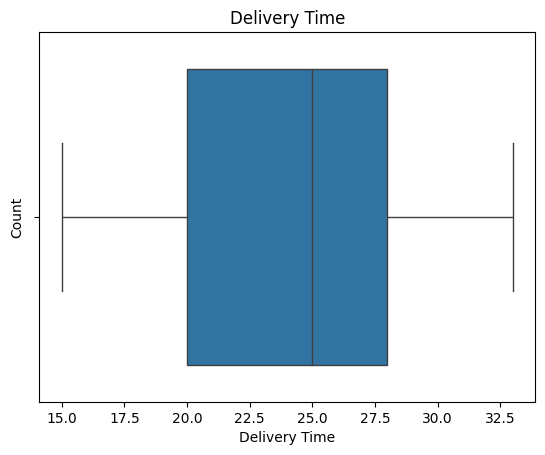

In [42]:
sns.boxplot(data=data, x = 'delivery_time');
plt.title('Delivery Time')
plt.xlabel('Delivery Time')
plt.ylabel('Count')
plt.show()

*   We can observe that the Delivery time is slightly skewed to the left.  
*   The median delivery time  it's 25 mins
*   There are no outliers
*   50% of the orders delivery time takes between 20 to 28 minutes.




<Figure size 2000x1000 with 0 Axes>

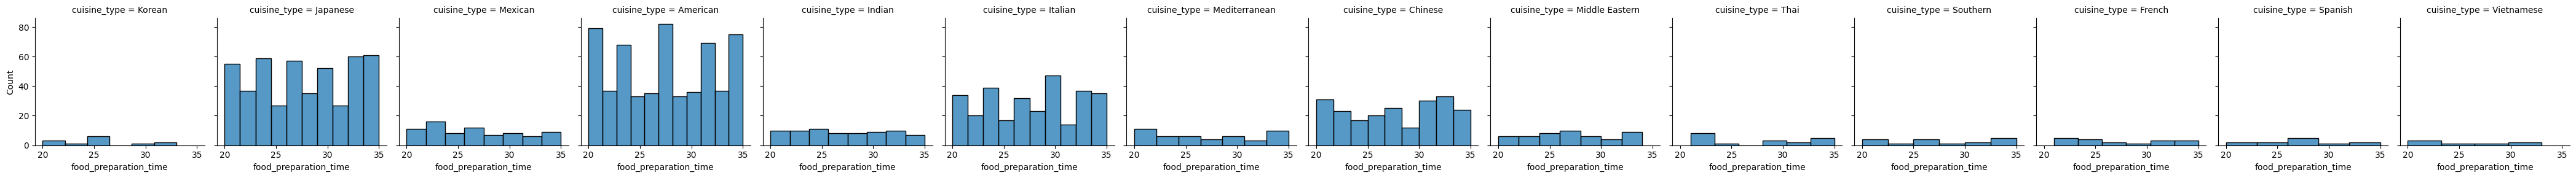

<Figure size 2000x1000 with 0 Axes>

In [38]:
g = sns.FacetGrid(data, col = 'cuisine_type')
g.map(sns.histplot, 'food_preparation_time');
plt.figure(figsize=(20,10))

*   We can observe that the cuisine tyoe that takes more preparation time are American, Japanese and Italian.
*   Vietnamese, French and Spanish food takes less preparation time, however as seen before those aren't ordered that often which could be impacting these results.



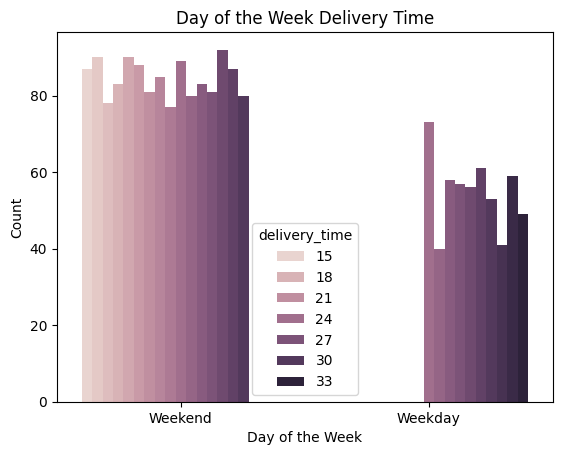

In [31]:
sns.countplot(data=data, x = 'day_of_the_week', hue = 'delivery_time');
plt.title('Day of the Week Delivery Time')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

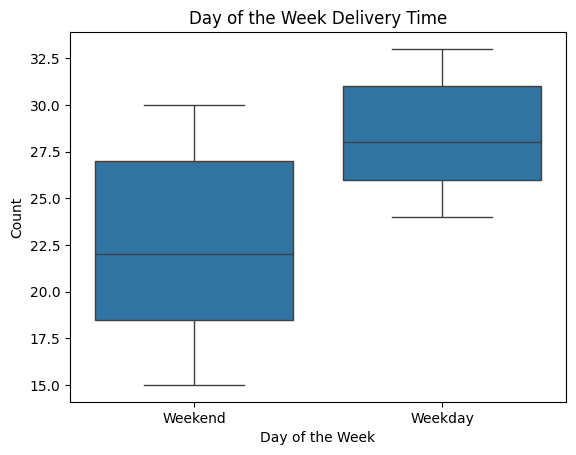

In [38]:
sns.boxplot(data=data, x = 'day_of_the_week', y = 'delivery_time');
plt.title('Day of the Week Delivery Time')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

*   We can observe that delivery time is higher during the weekdays than during weekends.

*   The weekend median time it's 22.5 while the weekday median it's 27.5.



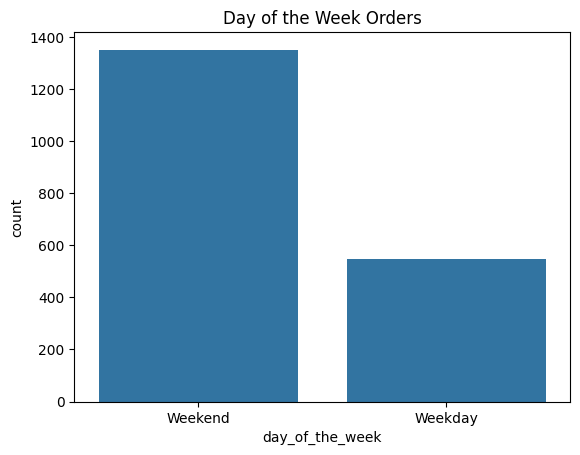

In [46]:
sns.countplot(data=data, x = 'day_of_the_week');
plt.title('Day of the Week Orders')
plt.show()

*   Foodhub receives  more than double weekday orders during the weekend, which could also explain why we have higher delivery times during the weekend.
*   It's interesting to observe that even though more orders are received during the weekend, delivery time is shorter than during the weekdays. This could be due to weekday traffic, less delivery staff, etc.



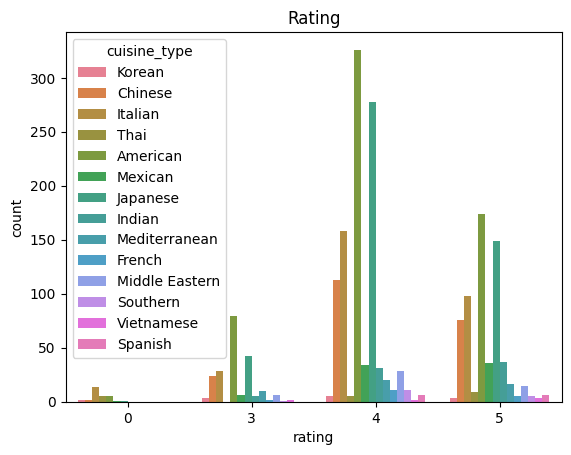

In [56]:
sns.countplot(data=data, x = 'rating', hue = 'cuisine_type');
plt.title('Rating')
plt.show()

*   We can observe that most of the orders had a 4 rating, with American food taking the lead.
*   5 is the second most popular rating with American food taking the lead.
*   We can also observe that the difference between 3 ratings with 4 and 5 is big. This could indicate that customers really like the restaurant selection in Foodhub.


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

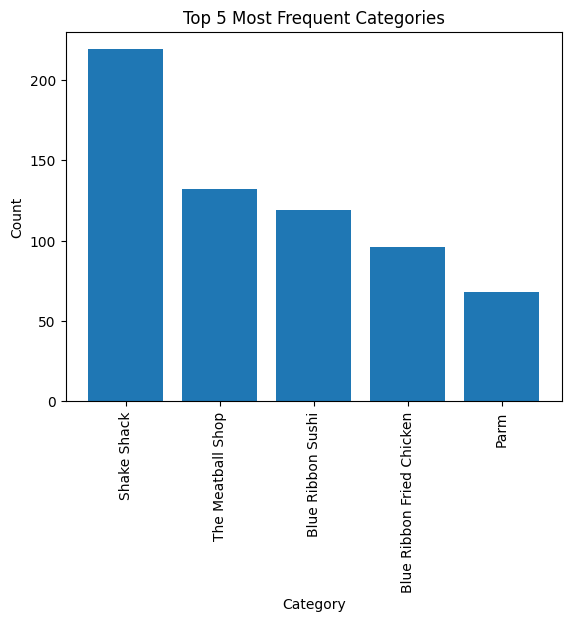

In [13]:
top_5 = data['restaurant_name'].value_counts().nlargest(5)
plt.bar(top_5.index, top_5.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Top 5 Most Frequent Categories')
plt.xticks(rotation=90)
plt.show()

We can see that the most of the orders are for Shake Shack which is American food, such as Blue ribbon Fried Chicken, both combined have a high impact on making American food the most popular type of cuisine.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [4]:
data['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

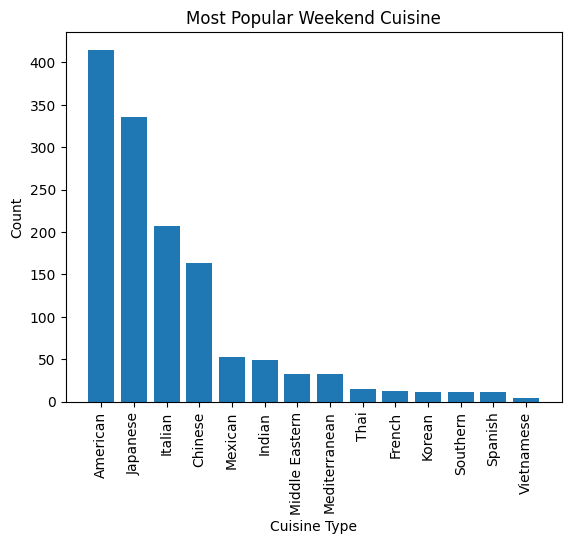

In [8]:
weekend_data = data[data['day_of_the_week'] == 'Weekend']
top_cuisines = weekend_data['cuisine_type'].value_counts()
plt.bar(top_cuisines.index, top_cuisines.values)
plt.xlabel("Cuisine Type")
plt.ylabel("Count")
plt.title("Most Popular Weekend Cuisine")
plt.xticks(rotation=90)
plt.show()

Most popular cuisine type during the weekends it's American food, followed by Japanese and Italian. That also correlates with the most popular restaurants which are American, Japanese and Italian.
We realized that during the weekends most of the orders are placed so it makes sense that the weekend's most popular cuisine types match the top 5 more frequent restaurants.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [12]:
(data['cost_of_the_order'] > 20).sum() / data.shape[0] * 100

np.float64(29.24130663856691)

29.24% of the orders costs more than 20 dollars. Is not a big percentage, meaning that most of the customers would rather to use Foodhub for cheap fast food rather than expensive speciality food.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [13]:
data['delivery_time'].mean()

np.float64(24.161749209694417)

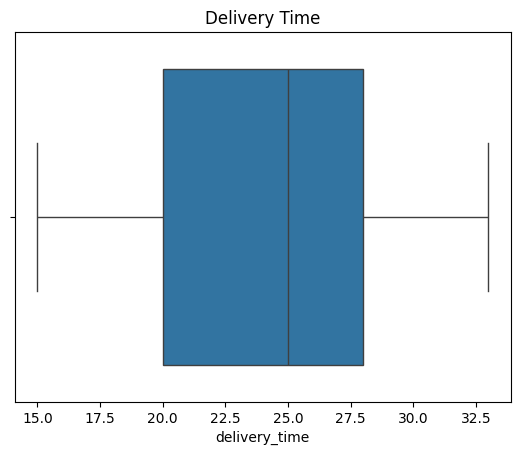

In [18]:
sns.boxplot(data=data, x = 'delivery_time')
plt.title('Delivery Time')
plt.show()

The mean order delivery time of 24.16 minutes is really decent considering the traffic and distance of a big city like New York, however the food preparation time plays also a crutial rol on the customer's delivery time satisfaction.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [64]:
top_customers = data.groupby('customer_id')['order_id'].count().nlargest(3).index
print(top_customers)

Index([52832, 47440, 83287], dtype='int64', name='customer_id')


In [15]:
data.groupby('customer_id')['order_id'].count().nlargest(3)

,order_id
customer_id,
52832,13
47440,10
83287,9


A 20% discount to the top 3 customers is pretty generous considering the number of orders each customer has made. Such a low number of orders per customer could indicate that custmers might prefer to use other platforms or eat at the restaurants instead of using Foodhub.


In [65]:
filtered_data = data[data['customer_id'].isin(top_customers)]
order_totals = filtered_data.groupby(['customer_id', 'order_id'])['cost_of_the_order'].sum().reset_index()
print(order_totals)

    customer_id  order_id  cost_of_the_order
0         47440   1476559              15.57
1         47440   1476854               6.45
2         47440   1476982               8.73
3         47440   1477178              24.20
4         47440   1477481              25.22
5         47440   1477594              12.18
6         47440   1477664              29.30
7         47440   1477903              16.25
8         47440   1477909              12.18
9         47440   1478120               8.10
10        52832   1476828               6.64
11        52832   1476916              15.72
12        52832   1477013               8.01
13        52832   1477041              25.17
14        52832   1477075              31.43
15        52832   1477129              19.30
16        52832   1477179              24.20
17        52832   1477302              12.23
18        52832   1477314               9.46
19        52832   1478160              15.86
20        52832   1478179              12.23
21        

In [69]:
total_orders = order_totals.shape[0]
high_cost_orders = order_totals[order_totals['cost_of_the_order'] > 20].shape[0]
percentage_high_cost = (high_cost_orders / total_orders) * 100
print(f"Percentage of orders with cost > $20: {percentage_high_cost:.2f}%")

Percentage of orders with cost > $20: 28.12%


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


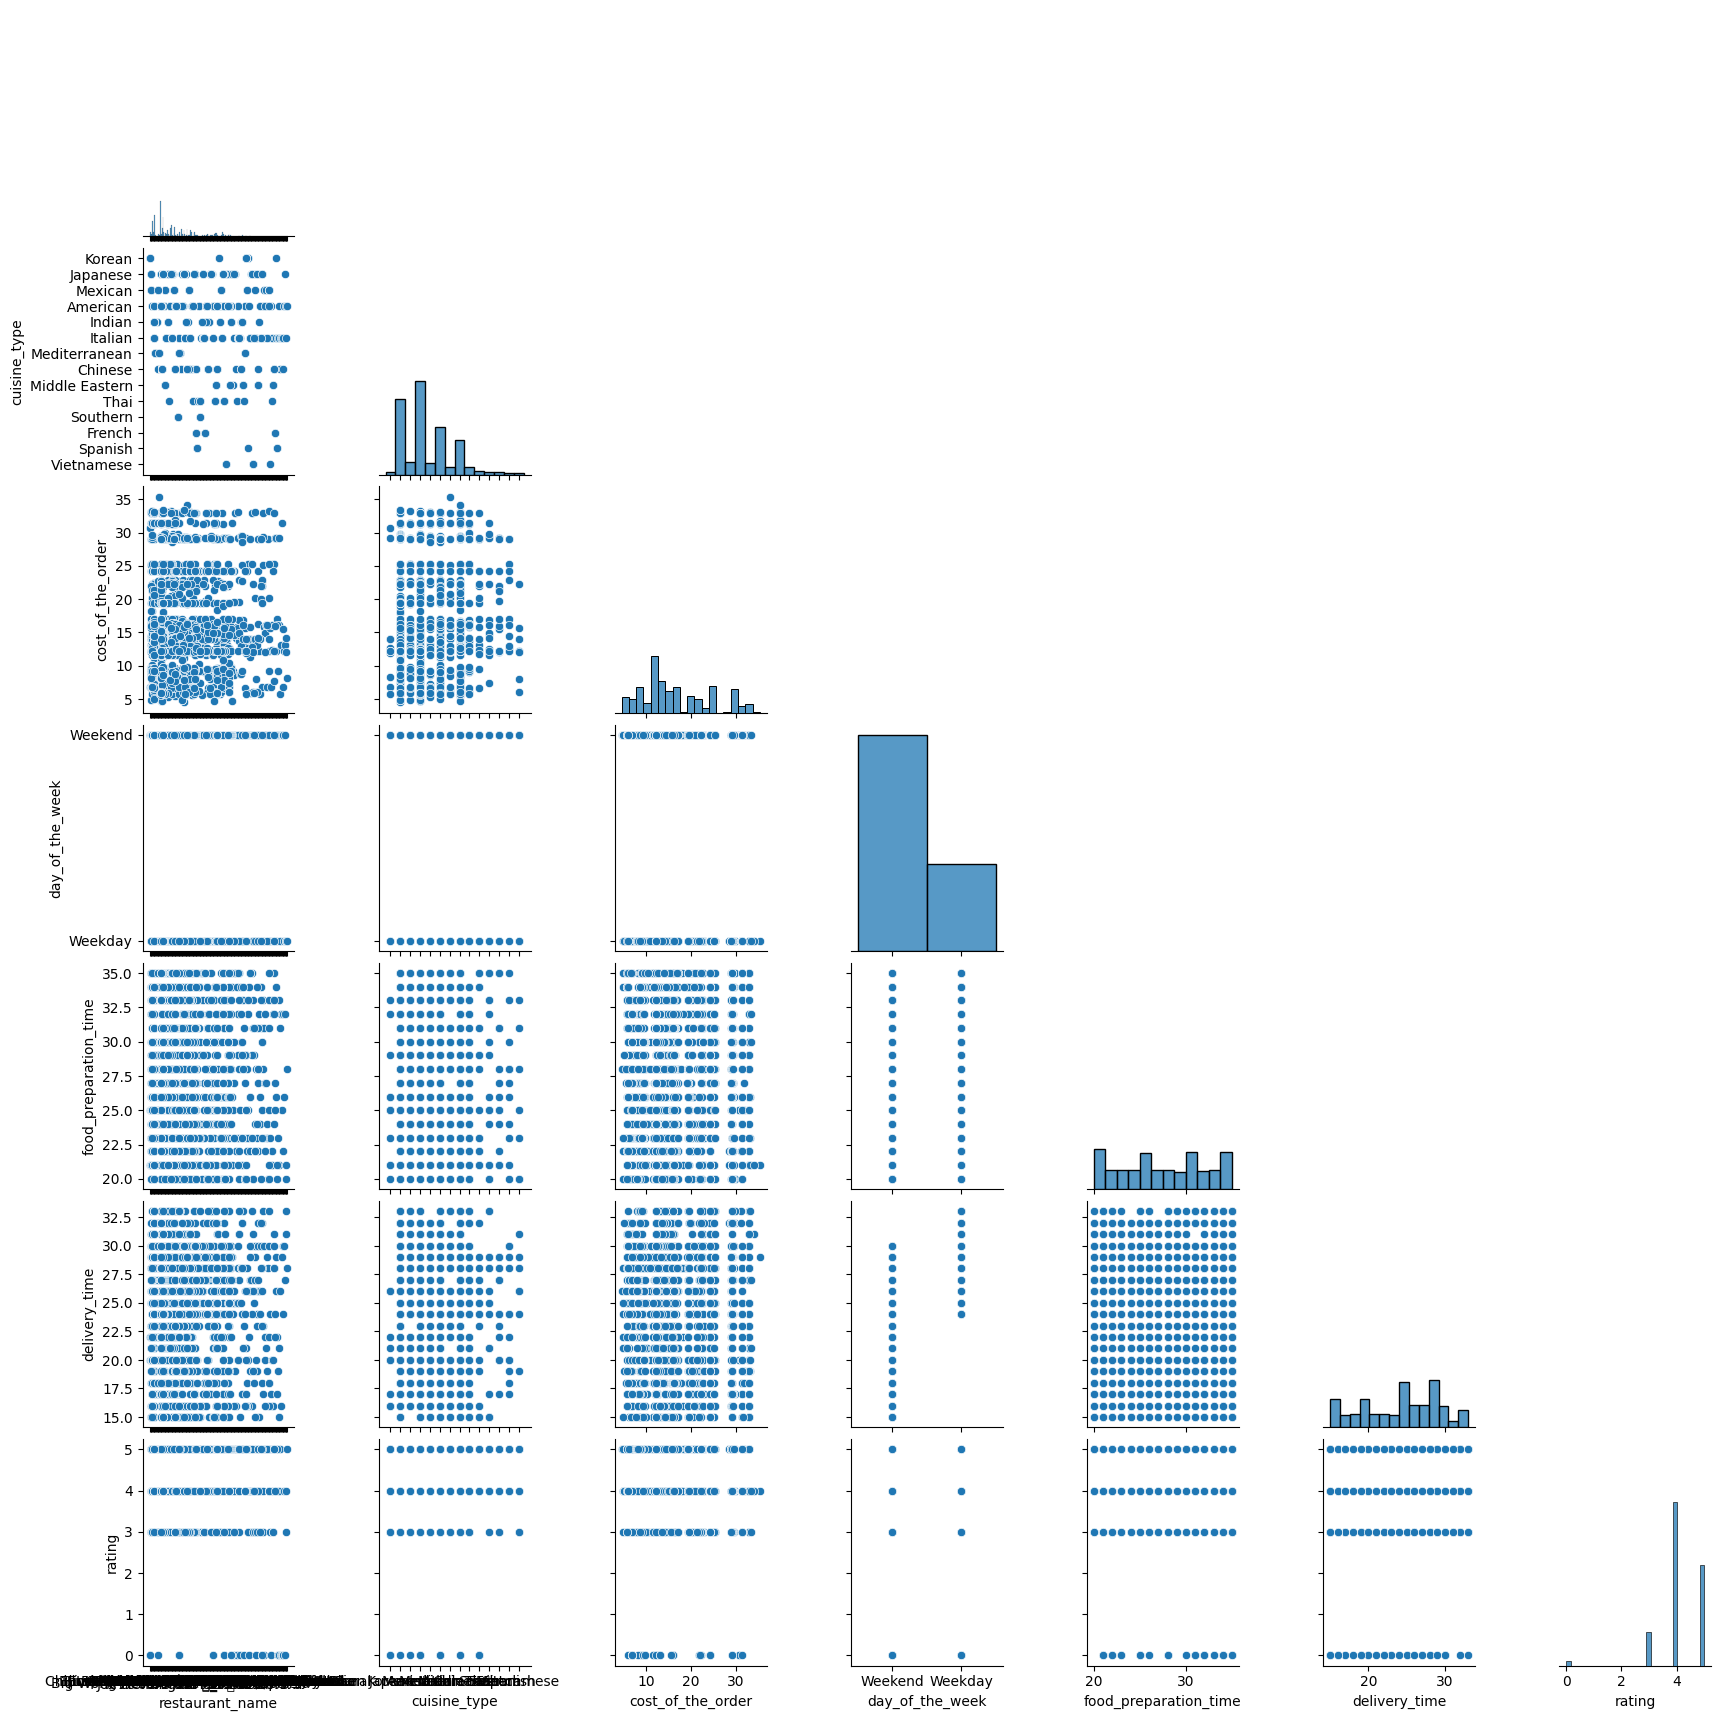

In [49]:
sns.pairplot(data = data, vars = ['restaurant_name', 'cuisine_type', 'cost_of_the_order', 'day_of_the_week', 'food_preparation_time', 'delivery_time', 'rating'], corner = True);
plt.show()

This graphs aren't that clear, I can see that data doesn't have much correlation, the data is really disperse so analyzing correlations through hypothesis feels like the best approach for this data set.

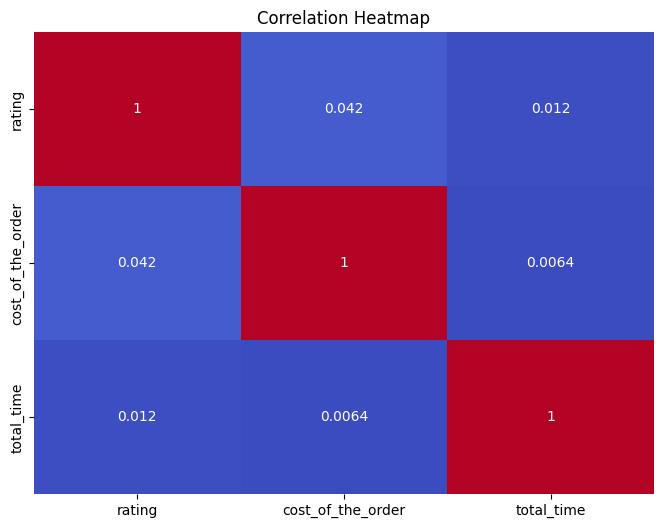

In [81]:
plt.figure(figsize=(8,6))
sns.heatmap(data = data[['rating', 'cost_of_the_order', 'total_time']].corr(), annot=True, cmap="coolwarm", cbar = False)
plt.title("Correlation Heatmap")
plt.show()

The correlations between the numerical data aren't that strong so it's not a good idea to explore deeper.

In [51]:
pd.crosstab(data['cuisine_type'], data['rating'])

rating,0,3,4,5
cuisine_type,,,,
American,5,79,326,174
Chinese,2,24,113,76
French,0,2,11,5
Indian,0,5,31,37
Italian,14,28,158,98
Japanese,1,42,278,149
Korean,2,3,5,3
Mediterranean,0,10,20,16
Mexican,1,6,34,36


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [51]:
filtered_data = data.groupby('restaurant_name').filter(lambda x: (x['rating'].mean() > 4) and (x['rating'].count() > 50))
qualified_restaurants = filtered_data[['restaurant_name']].drop_duplicates()
print(qualified_restaurants)

              restaurant_name
3   Blue Ribbon Fried Chicken
6           The Meatball Shop
15                Shake Shack
18             RedFarm Hudson
19          Blue Ribbon Sushi
34                       Parm
42           RedFarm Broadway


#### Observations: Only 7 restaurants meet the criteria and they 5 of them are the top 5 restaurants, it's definitely a good idea to offer them a promotional code in order to engage the customers.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [54]:
data['comission'] = data['cost_of_the_order'].apply(lambda x: 0.25 * x if x > 20 else (0.15 * x if x > 5 else 0))
total_revenue = data['comission'].sum()
print(f"Net revenue: ${total_revenue:.2f}")

Net revenue: $6166.30


The net revenue is not so big considering the total number of orders, however we do know that only a 29% of the orders had a cost above 20 dolars, and Foodhub charges a higher comission for orders greater than 20 USD. They definitely need different strategies to engage the customer with bigger orders.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [52]:
data['total_time'] = data['food_preparation_time'] + data['delivery_time']
(data['total_time'] > 60).sum() / data.shape[0] * 100

np.float64(10.537407797681771)

Only a 10% of the orders is taking more than 60 minutes to get to the customer. I want to analize this deeper to see the impact of this delayed orders on the customer's behaviour.


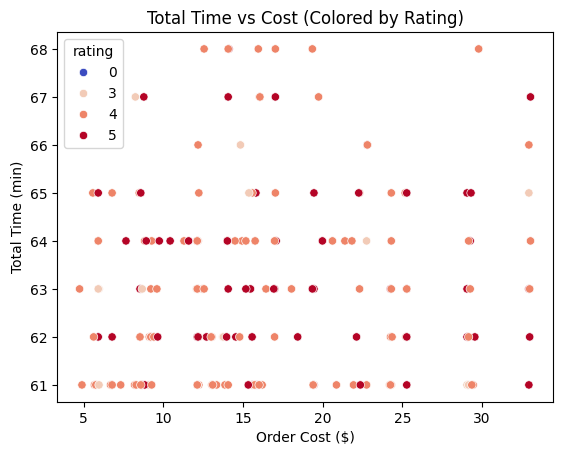

In [57]:
filtered_data = data[data['total_time'] > 60]
sns.scatterplot(x=filtered_data['cost_of_the_order'], y=filtered_data['total_time'], hue=filtered_data['rating'], palette='coolwarm')
plt.xlabel("Order Cost ($)")
plt.ylabel("Total Time (min)")
plt.title("Total Time vs Cost (Colored by Rating)")
plt.show()

We can observe that the highest delivery time orders have a 4 rating, which is not that bad overall considering the delivery time. It'll be interesting to get data on the customer location and how far away the selected restaurant is. The type of cuisine could also be influenting the rating and the customer's understanding for such long delivery times.

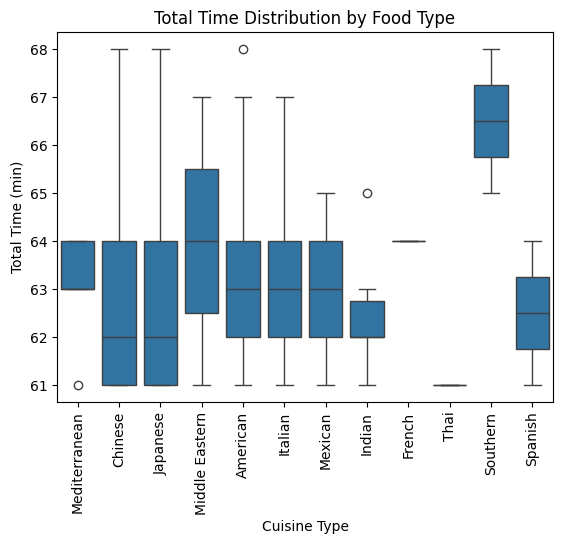

In [61]:
sns.boxplot(x=filtered_data['cuisine_type'], y=filtered_data['total_time'])
plt.xticks(rotation=90)
plt.xlabel("Cuisine Type")
plt.ylabel("Total Time (min)")
plt.title("Total Time Distribution by Food Type")
plt.show()

*   The types of cuisine that took the longest in general are Middle Easternand Southern. Both are speciality cuisines, it makes sense that they could take longer.
*   Most of the cuisine types have long whiskers which indicate that 25% of the delayed orders have range between 64 and 68 minutes. A 4 minutes difference is not that big.
*   American and Indian food have far away outliers which can indicate that a particular situation made the order delivery time so long.





### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

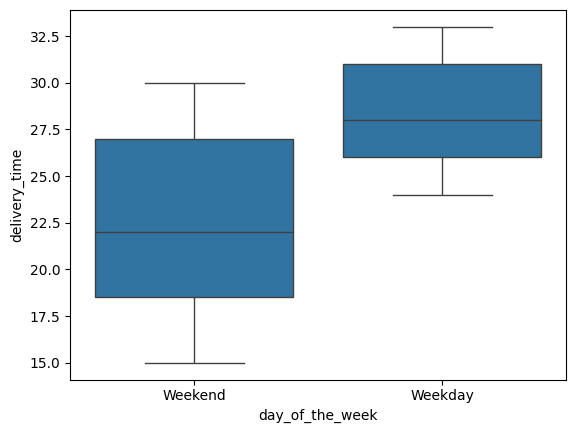

In [27]:
sns.boxplot(data=data, x = 'day_of_the_week', y = 'delivery_time')
plt.show()

*   Foodhub receives  more than double weekday orders during the weekend, which could also explain why we have higher delivery times during the weekend.
*   It's interesting to observe that even though more orders are received during the weekend, delivery time is shorter than during the weekdays. This could be due to weekday traffic, less delivery staff, restaurants might have more staff during weekend due to demand, etc.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Foodhub receives more orders during weekend than during weekdays.
*   Delivery time is shorter during weekends than during weekdays.
*   Average delivery time is short
*   The average order cost is 16 dollars.
*   Foodhub charges a 25% fee on orders above 20 USD, however only 29% of the orders meet the criteria.
*   American food, Japanese Food and Italian Food are the most popular cuisines overall.
*   Most of customers ratings are above 4.
*   Top 3 frequent customers sum a total 32 of orders, whis is not that much and only 28% of their orders are above 20 USD.
*   Deliveries that take more than one hour don't impact the ratings.


### Recommendations:

*  Foodhub revenue is not as big as expected since only 29% of the orders are meeting the criteria to charge the biggest comission which is 25%. This means that 71% of the orders are really small orders with a total cost beneath 20 dollars and a really small revenue. The average order cost is 16 dollars so Foodhub is only getting 0.8 USD profit from most of it's orders.
It's a fact that customers have a good perception of Foodhub's restaurant catalogue, this can be observed on the ratings. They also seem to have a preference for American, Japanese and Italian food from specific restaurants like Shake Shak, The Meatball and Blue Ribbon Sushi.
Customers tend to order more during weekends and during weekends delivery time is shorter which can impact on positive reviews.
I would strongly advise FoodHub to encourage customers to make orders above 20 USD during weekends by collaborating with Shake Shack, The Meatball Shop and Blue Ribbon Sushi. Foodhub is already planning on providing free advertising to the best rated restaurants with more than 50 orders and these 3 restaurants meet the criteria, so FoodHub can take this negotiation further.
I would remove the top 3 customers discount since only 28% of their orders are above 20 USD, the amount FoodHub gets most of it's revenue and with this offer Foodhub would only be getting a 5% revenue. To replace the vouchers I will suggest a frequent customer program to improve customer's loyalty and engage them with the application.
I would also suggest to include the delivery distance so we can analyze deeper the correlation between ratings and delivery time.

---